In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
import plotly.express as px
import seaborn as sns
from scipy.optimize import minimize
from scipy.integrate import solve_ivp
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
import plotly.graph_objects as go
from IPython.display import HTML,display
import warnings
warnings.filterwarnings("ignore")
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.pyplot as py

In [3]:
#importing main dataset 
df = pd.read_csv('Documents/covid_19_india.csv', parse_dates=['Date'],dayfirst=True)

#importing tests dataset
tests = pd.read_csv('Documents/StatewiseTestingDetails.csv' )

In [4]:
#keeping only required columns
df = df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
#renaming column names
df.columns = [ 'date','state','cured','deaths','confirmed']

In [5]:
df

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
9286,2020-12-09,Telengana,266120,1480,275261
9287,2020-12-09,Tripura,32169,373,32945
9288,2020-12-09,Uttarakhand,72435,1307,79141
9289,2020-12-09,Uttar Pradesh,528832,7967,558173


In [6]:
#keeping only required columns
tests = tests[['Date', 'State','TotalSamples','Negative','Positive']]
#renaming column names
tests.columns = ['date', 'state','total_samples','negative','positive']

In [7]:
tests['negative'][tests['negative'].isna()]=tests['total_samples']-tests['positive']

In [8]:
df

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
9286,2020-12-09,Telengana,266120,1480,275261
9287,2020-12-09,Tripura,32169,373,32945
9288,2020-12-09,Uttarakhand,72435,1307,79141
9289,2020-12-09,Uttar Pradesh,528832,7967,558173


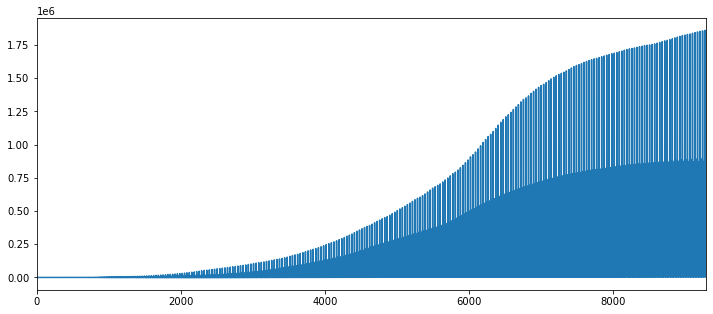

In [9]:
df['confirmed'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

<AxesSubplot:>

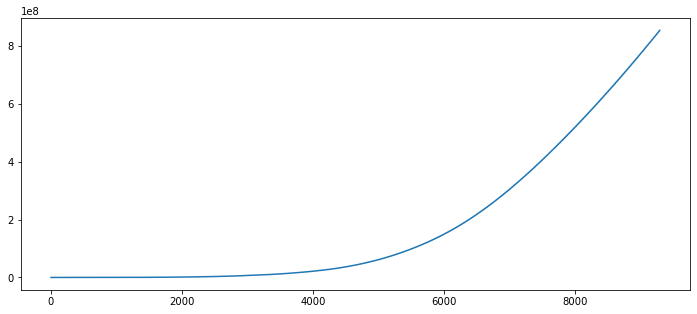

In [10]:
df['confirmed'].expanding().sum().plot(figsize=(12,5))

In [11]:
import matplotlib.pyplot as plt

In [12]:
title ='Confirmed Cases'
ylabel='Count of confirmed cases'
xlabel='Dates'

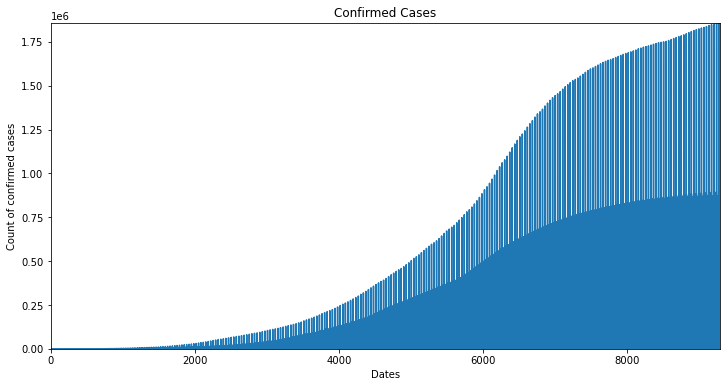

In [13]:
ax=df['confirmed'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='both',tight=True)
ax.set(xlabel=xlabel,ylabel=ylabel);

Text(08/06/20, 5000, 'Unlock 1.0')

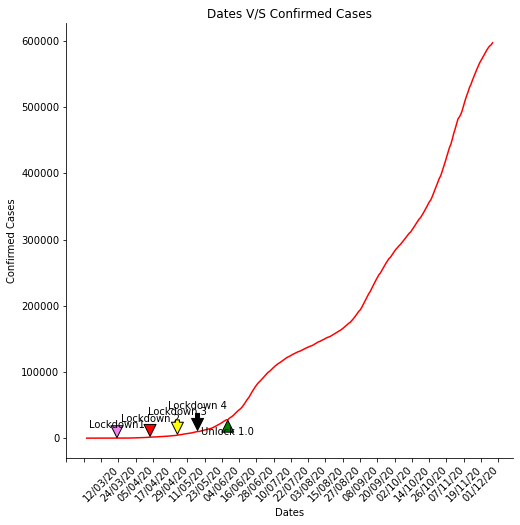

In [14]:
df_m = pd.read_csv("Documents/covid_19_india.csv")
df_delhi = df_m[(df_m['State/UnionTerritory']=='Delhi')]
plt.figure(figsize=(8,8))
plt.plot(df_delhi['Date'],df_delhi['Confirmed'],'-r')
plt.rc("xtick",labelsize=9)
plt.rc("ytick",labelsize=10)
ax = plt.gca()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 12))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=45)
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('Dates V/S Confirmed Cases')
ax.annotate('Lockdown1', xy =('23/03/20',29), xytext=('23/03/20',15000),ha='center',
                arrowprops = dict(facecolor ='Violet',shrink = 0.05),) 
ax.annotate('Lockdown 2', xy =('15/04/20',1561), xytext=('15/04/20',25000),ha='center',
                arrowprops = dict(facecolor ='Red',shrink = 0.05),) 
ax.annotate('Lockdown 3', xy =('04/05/20',4549), xytext=('04/05/20',35000),ha='center', 
                arrowprops = dict(facecolor ='Yellow',shrink = 0.05),) 
ax.annotate('Lockdown 4', xy =('18/05/20',10054), xytext=('18/05/20',45000),ha='center',
                arrowprops = dict(facecolor ='Black',shrink = 0.05),) 
ax.annotate('Unlock 1.0', xy =('08/06/20',27654), xytext=('08/06/20',5000),ha='center',
                arrowprops = dict(facecolor ='Green',shrink = 0.05),)

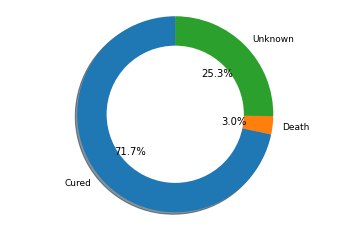

In [15]:
df_delhi = df_m[(df_m['State/UnionTerritory']=='Delhi')]
df_dt=df_delhi[(df_delhi['Date']=='06/07/20')]
labels = 'Cured', 'Death', 'Unknown'
sizes = [71.7, 3.0, 25.3]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [16]:
#current date
today = df[df.date == '2020-07-14']

In [17]:
df2 = df.groupby(['date'])['confirmed', 'deaths','cured',].sum().reset_index()

In [18]:
#making columns for daily new cases
df2['new_confirmed'] = df2.confirmed.diff()
df2['new_deaths'] = df2.deaths.diff()
df2['new_cured'] = df2.cured.diff()


#taking dates from 15th March
df2 = df2.iloc[44:]

In [19]:
fig = go.Figure(go.Bar(x= df2.date, y= df2.cured, name='Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.deaths, name='Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.confirmed, name='Confirmed'))

fig.update_layout(barmode='stack',legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Covid 19 Total cases in India (since 15 March)<b>',
                  title_x=0.5,
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",)
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.show()

In [20]:
fig = go.Figure(go.Bar(x= df2.date, y= df2.new_cured, name='Daily Recovered'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_deaths, name='Daily Deaths'))
fig.add_trace(go.Bar(x=df2.date, y= df2.new_confirmed, name='Daily Confirmed'))
fig.update_xaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.update_yaxes(tickfont=dict(family='Rockwell', color='black', size=14))
fig.add_annotation(
            x= "2020-04-03",
            y=23000,
           text="<b>Lockdown 1<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-04-23",
            y=23000,
            text="<b>Lockdown 2<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x="2020-05-10",
            y=23000,
           text="<b>Lockdown 3<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)
fig.add_annotation(
            x= "2020-05-24",
            y=23000,
            text="<b>Lockdown 4<b>",showarrow= False,font=dict(
            family="Courier New, monospace",
            size=12,
            color="teal"
            ),
        align="center",)

fig.update_layout(barmode='stack', 
                  xaxis={'categoryorder':'total descending'},
                 title_text='<b>Daily Cases (since 15 March)<b>',
                  title_x=0.5,legend_orientation="h",legend=dict(x= 0.3, y=1.1),
                 paper_bgcolor='whitesmoke',
                 plot_bgcolor = "whitesmoke",
                  shapes=[
        
        dict(
            type="rect",
            # x-reference is assigned to the x-values
            xref="x",
            # y-reference is assigned to the plot paper [0,1]
            yref="paper",
            x0="2020-03-25",
            y0=0,
            x1="2020-04-14",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-04-15",
            y0=0,
            x1="2020-05-03",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-04",
            y0=0,
            x1="2020-05-17",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        ),
        dict(
            type="rect",
            xref="x",
            yref="paper",
            x0="2020-05-18",
            y0=0,
            x1="2020-05-31",
            y1=1,
            fillcolor="Lightgreen",
            opacity=0.3,
            layer="below",
            line_width=2,
        )
        
        
        
    ]
)
fig.show()


In [21]:
state = list(today.state)
cases = list(today.confirmed)

fig= go.Figure(go.Treemap(
    
    labels =  state,
    parents=[""]*len(state),
    values =  cases,
    textinfo = "label+percent entry"
))
fig.update_layout(
    title_text= '<b>Distribution of Confirmed Cases in India<b>',
    title_x=0.5,
    paper_bgcolor='lightgoldenrodyellow',
    plot_bgcolor = "lightgoldenrodyellow",
    
    )

fig.show()

In [22]:
#Inference : Out of all the confirmed cases Maharashtra has the 29% of confirmed cases.Tamil Nadu have 16% cases and Delhi have 13%. One way to intrpret this is out of 100 people who have covid-19 in India 29 people are from maharashtra , 16 people are from Tamil Naidu and 13 people are from Delhi . One Intersting thing notice here is that Gujrat which has only 5% of total cases in India has highest Fatality Rate.